In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("Covid Data.csv")

In [4]:
df.head(3)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2


In [5]:
df.describe

<bound method NDFrame.describe of          USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         

In [6]:
df.drop(["DATE_DIED"], axis = 'columns',  inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USMER,1048575.0,1.632194,0.482208,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,1048575.0,8.980565,3.723278,1.0,4.0,12.0,12.0,13.0
SEX,1048575.0,1.499259,0.500000,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1048575.0,1.190765,0.392904,1.0,1.0,1.0,1.0,2.0
INTUBED,1048575.0,79.522875,36.868886,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,1048575.0,3.346831,11.912881,1.0,2.0,2.0,2.0,99.0
AGE,1048575.0,41.794102,16.907389,0.0,30.0,40.0,53.0,121.0
PREGNANT,1048575.0,49.765585,47.510733,1.0,2.0,97.0,97.0,98.0
DIABETES,1048575.0,2.186404,5.424242,1.0,2.0,2.0,2.0,98.0
COPD,1048575.0,2.260569,5.132258,1.0,2.0,2.0,2.0,98.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

In [9]:
df.CLASIFFICATION_FINAL.value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [10]:
df['CLASIFFICATION_FINAL'] = df.CLASIFFICATION_FINAL.apply(lambda x: x-1)

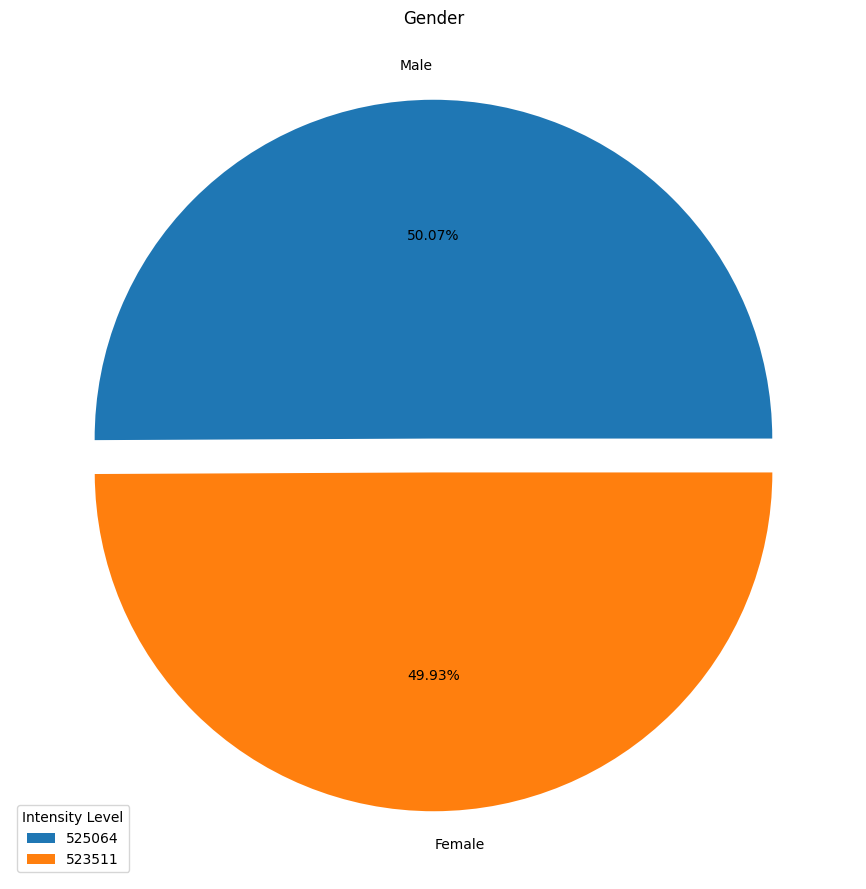

In [11]:
plt.figure(figsize = (15, 11))
plt.title("Gender")
plt.pie(df.SEX.value_counts(), explode = (0.05, 0.05), labels = ['Male', 'Female'],autopct = '%1.2f%%')
plt.legend(df.SEX.value_counts(), loc = 'lower left', title = 'Intensity Level')

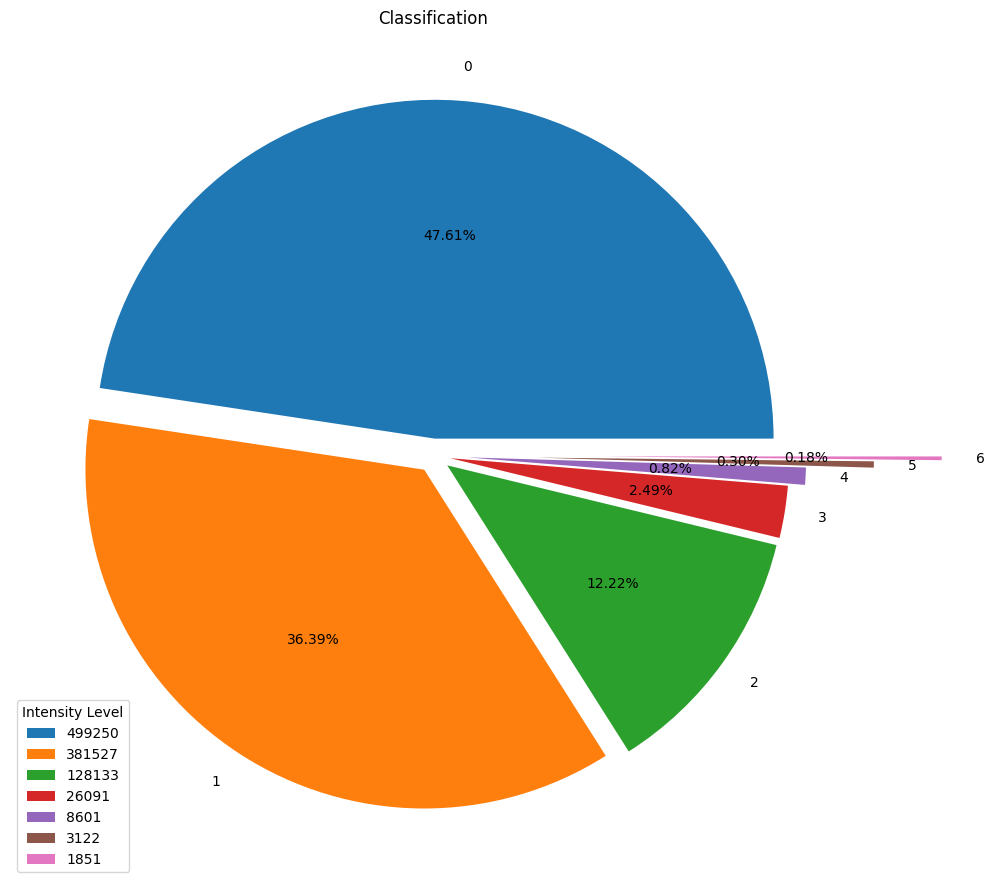

In [13]:
plt.figure(figsize = (15, 11))
plt.title("Classification")
plt.pie(df.CLASIFFICATION_FINAL.value_counts(), explode = (0.05, 0.05, 0.05, 0.05, 0.1, 0.3, 0.5), labels = ['0','1','2','3','4','5','6'],autopct = '%1.2f%%')
plt.legend(df.CLASIFFICATION_FINAL.value_counts(), loc = 'lower left', title = 'Intensity Level')

In [14]:
x = df.loc[:, df.columns.drop('CLASIFFICATION_FINAL')]
x = StandardScaler().fit_transform(x)

In [15]:
x

array([[ 0.76275324, -2.14342559, -0.99852004, ..., -0.05008022,
        -0.0402647 ,  0.47377997],
       [ 0.76275324, -2.14342559,  1.00148216, ..., -0.24480886,
        -0.0402647 ,  0.47377997],
       [ 0.76275324, -2.14342559,  1.00148216, ..., -0.05008022,
        -0.0402647 , -2.10612542],
       ...,
       [ 0.76275324,  1.07954257,  1.00148216, ..., -0.05008022,
        -0.0402647 ,  0.47377997],
       [ 0.76275324,  1.07954257,  1.00148216, ..., -0.05008022,
        -0.0402647 ,  0.47377997],
       [ 0.76275324,  1.07954257,  1.00148216, ..., -0.05008022,
        -0.0402647 ,  0.47377997]])

In [17]:
y = df['CLASIFFICATION_FINAL'].values
y

array([2, 4, 2, ..., 6, 6, 6])

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [19]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm)
    cm.plot()

In [20]:
model_lr = LogisticRegression()

In [21]:
model_lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.5365209347273924
Recall :  0.5365209347273924
Accuracy :  0.5365209347273924
F1 Score :  0.5365209347273924

 [[     0      0    743      0      0      0   1892]
 [     0      0    546      0      0      0     20]
 [     1      0  37850      0      0     14  76553]
 [     0      0    175      0      0      0    741]
 [     0      0   1721      0      0     54   6195]
 [     0      0   7687      0      0   2704  28119]
 [     0      0  20798      0      0    539 128221]]


******************************************************
                Classification Report
******************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2635
           1       0.00      0.00      0.00       566
           2       0.54      0.33      0.41    114418
           3       0.00      0.00      0.00       916
           4       0.00      0.00      0.00      7970
           5       0.82      0.07      0.13     38510
           6       0.53      0.86      0.66    149558

    accuracy                           0.54    314573
   macro avg       0.27      0.18      0.17    314573
weighted avg       0.55      0.54      0.48    314573

******************************************************



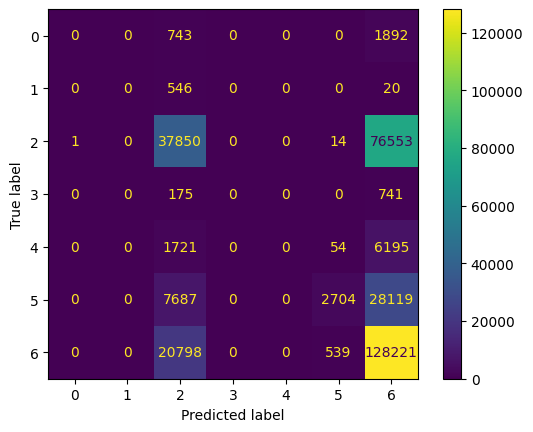

In [23]:
perform(y_pred_lr)

In [24]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred_dt = model_dt.predict(x_test)

Precision :  0.5221395351794337
Recall :  0.5221395351794337
Accuracy :  0.5221395351794337
F1 Score :  0.5221395351794337

 [[    86     11    724      4     27    284   1499]
 [     5      9    426      0     11     35     80]
 [   451    237  41199     71    598   3742  68120]
 [     2      2    182      1      0     11    718]
 [    28      5   1964      5     84    342   5542]
 [   229     30  10114     12    162   5853  22110]
 [   316     87  26825     50    654   4607 117019]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.08      0.03      0.05      2635
           1       0.02      0.02      0.02       566
           2       0.51      0.36      0.42    114418
           3       0.01      0.00      0.00       916
           4       0.05      0.01      0.02      7970
           5       0.39      0.15  

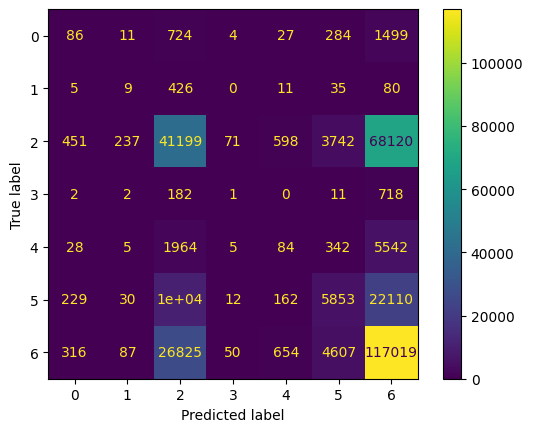

In [26]:
perform(y_pred_dt)

In [27]:
filename = 'Covid_Classification_dt.h5'
pickle.dump(model_dt, open(filename, 'wb'))

In [28]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.5271208908584017
Recall :  0.5271208908584017
Accuracy :  0.5271208908584017
F1 Score :  0.5271208908584017

 [[    44      4    724      1     13    292   1557]
 [     1      9    433      0      4     31     88]
 [   208    115  39675     40    409   3513  70458]
 [     0      1    178      1      3      8    725]
 [    15      2   1832      3     49    305   5764]
 [   115     13   9303      8    105   5926  23040]
 [   120     50  24669     31    373   4201 120114]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.09      0.02      0.03      2635
           1       0.05      0.02      0.02       566
           2       0.52      0.35      0.41    114418
           3       0.01      0.00      0.00       916
           4       0.05      0.01      0.01      7970
           5       0.42      0.15  

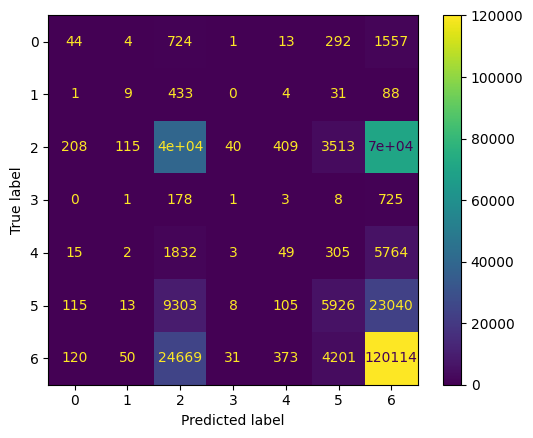

In [30]:
perform(y_pred_rf)

In [31]:
filename = 'Covid_Classification_rf.h5'
pickle.dump(model_rf, open(filename, 'wb'))